In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [69]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
# Chargement du jeu de données MNIST
train_dataset = torchvision.datasets.MNIST(root='mnist_data', train=True, transform=T, download=True)
test_dataset = torchvision.datasets.MNIST(root='mnist_data', train=False, transform=T, download=True)

# Chargeurs de données
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Accès aux images du jeu de données d'entraînement MNIST

In [70]:
train_dataset[0][0] # image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [71]:
train_dataset[1][0] # image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [72]:
train_dataset[2][0] # image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

# Extraction des étiquettes associées aux images

In [73]:
label_first_element = train_dataset[0][1]

print(label_first_element)

5


In [74]:
train_dataset[1][1] # etiquette de l'image

0

In [75]:
train_dataset[2][1] # etiquette de l'image

4

In [76]:
train_dataset[3][1] # etiquette de l'image

1

# Affichage des images à l'aide de Matplotlib

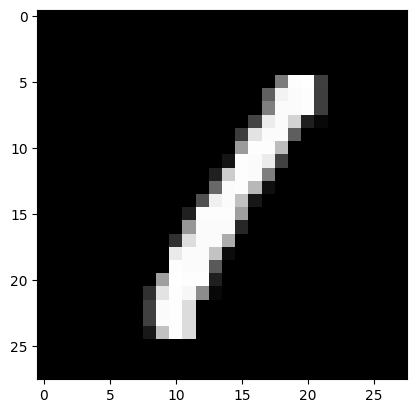

In [77]:
plt.imshow(train_dataset[3][0][0], cmap='gray')


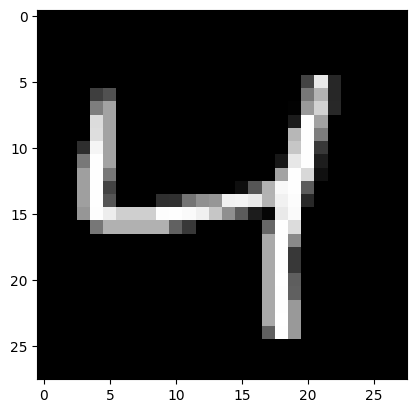

In [78]:
plt.imshow(train_dataset[2][0][0], cmap='gray')


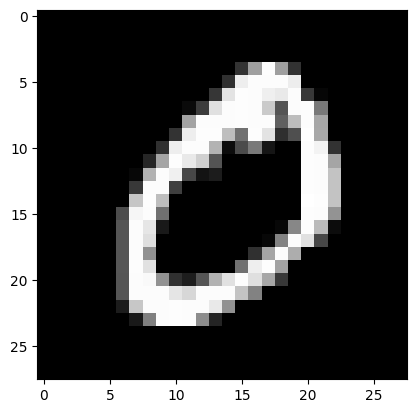

In [79]:
plt.imshow(train_dataset[1][0][0], cmap='gray')


**Définition du modèle CNN avec dropout**

In [80]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Couches de convolution
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=2)
        # Couches entièrement connectées
        self.fc1 = nn.Linear(16 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 10)
        # Dropout
        self.dropout = nn.Dropout(p=0.5)  # Ajout d'une couche dropout avec une probabilité de 0.5

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Appliquer dropout après la première couche entièrement connectée
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
# Instanciation du modèle
model = Net()

In [81]:
# Optimiseur Adam
optimizer = optim.Adam(model.parameters(), lr=0.0001)
# Loss Function
criterion = nn.CrossEntropyLoss()

In [82]:
# Entraînement sur GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

**Entraînement du modèle**

In [83]:
# Boucle d'entraînement
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 1000 == 999:  # print every 1000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


**Évaluation du modèle**

In [84]:
# Évaluation du modèle
from sklearn.metrics import f1_score
model.eval()
correct = 0
total = 0
predicted_labels = []
actual_labels = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predicted_labels.extend(predicted.cpu().numpy())
        actual_labels.extend(labels.cpu().numpy())

accuracy = correct / total
print(f'Accuracy on test set: {100 * accuracy:.2f}%')

# F1 Score
f1 = f1_score(actual_labels, predicted_labels, average='weighted')
print(f'F1 Score: {f1:.4f}')


Accuracy on test set: 97.72%
F1 Score: 0.9772


In [86]:
class RCNN(nn.Module):
    def __init__(self):
        super(RCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(in_features=16 * 7 * 7, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=84)
        self.fc4 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 7 * 7)  # Correction : Utilisation de 16 au lieu de 32 dans la vue
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # Correction : Appliquer ReLU à fc2 également
        x = torch.relu(self.fc3(x))  # Correction : Appliquer ReLU à fc3 également
        x = self.fc4(x)
        return x

# Instanciation du modèle
model_rcnn = RCNN()


In [87]:
# Entraînement sur GPU si disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_rcnn.to(device)

RCNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
)

In [90]:
# Loss Function
criterion = nn.CrossEntropyLoss()
# Optimiseur Adam
optimizer = optim.Adam(model_rcnn.parameters(), lr=0.0001)

In [89]:
# Boucle d'entraînement
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = model_rcnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0
print('Finished Training')

Epoch 1, Batch 100, Loss: 2.2132
Epoch 1, Batch 200, Loss: 1.2519
Epoch 1, Batch 300, Loss: 0.6987
Epoch 1, Batch 400, Loss: 0.5908
Epoch 2, Batch 100, Loss: 0.4388
Epoch 2, Batch 200, Loss: 0.3980
Epoch 2, Batch 300, Loss: 0.3815
Epoch 2, Batch 400, Loss: 0.3370
Epoch 3, Batch 100, Loss: 0.3072
Epoch 3, Batch 200, Loss: 0.2796
Epoch 3, Batch 300, Loss: 0.2731
Epoch 3, Batch 400, Loss: 0.2567
Epoch 4, Batch 100, Loss: 0.2373
Epoch 4, Batch 200, Loss: 0.2319
Epoch 4, Batch 300, Loss: 0.2223
Epoch 4, Batch 400, Loss: 0.2029
Epoch 5, Batch 100, Loss: 0.1880
Epoch 5, Batch 200, Loss: 0.1903
Epoch 5, Batch 300, Loss: 0.1811
Epoch 5, Batch 400, Loss: 0.1719
Epoch 6, Batch 100, Loss: 0.1580
Epoch 6, Batch 200, Loss: 0.1483
Epoch 6, Batch 300, Loss: 0.1512
Epoch 6, Batch 400, Loss: 0.1512
Epoch 7, Batch 100, Loss: 0.1375
Epoch 7, Batch 200, Loss: 0.1368
Epoch 7, Batch 300, Loss: 0.1235
Epoch 7, Batch 400, Loss: 0.1142
Epoch 8, Batch 100, Loss: 0.1138
Epoch 8, Batch 200, Loss: 0.1110
Epoch 8, B

In [67]:
# Évaluation du modèle
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model_rcnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')
# F1 Score
f1 = f1_score(actual_labels, predicted_labels, average='weighted')
print(f'F1 Score: {f1:.4f}')

Accuracy on the test set: 97.88%
F1 Score: 0.9769
